<a href="https://colab.research.google.com/github/gdimovski/Discourse-markers-Project/blob/main/Seminarska_Discourse_markers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/seminarska1.csv")
data.head()

Unnamed: 0  ...                                             con_en
0           0  ...  in some respects. And Im here to talk about th...
1           1  ...  The experiments had to be wrong, and they were...
2           2  ...  Ill try to make that clear -- partially clear....
3           3  ...  Somewhere in some other planet, orbiting some ...
4           4  ...  and are interested in science. Its not impossi...

[5 rows x 8 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.columns

Index(['Unnamed: 0', 'Column1', 'BG', 'EN', 'MWE', 'f', 'con_bg', 'con_en'], dtype='object')

In [ ]:
data_bg = data.drop(["Unnamed: 0","Column1","EN","MWE","con_en"], axis = 1)
data.drop(columns=["Unnamed: 0","Column1","BG","MWE","con_bg"],axis=1)


EN  ...                                             con_en
0                                          For example,  ...  in some respects. And Im here to talk about th...
1     "You know, theres a man with an experiment tha...  ...  The experiments had to be wrong, and they were...
2     and that is, it has nothing to do with human b...  ...  Ill try to make that clear -- partially clear....
3     and are interested in science. Its not impossi...  ...  Somewhere in some other planet, orbiting some ...
4     And suppose they have, you know, very differen...  ...  and are interested in science. Its not impossi...
...                                                 ...  ...                                                ...
2423                               but that is similar.  ...  Most likely both are made in China, so, I mean...
2424            and this is the map that you see today.  ...  They were gone in one hour. They realized they...
2425              And you know how were getting there?'  ...  this is a community for everyone. It started b...
2426                                         Of course.  ...  or we could watch it." And 9.9 times out of 10...
2427                                Heres what I mean.'  ...  that doesnt exist. Then we also have to be car...

[2428 rows x 3 columns]

In [ ]:
data_bg.head()

BG  ...                                             con_bg
0                                   Например, жените  ...  се различава от мъжкия и съм тук да говоря за ...
1  "Знаете ли, има човек с експеримент, който изг...  ...  Експериментите трябваше да са погрешни; и те б...
2  и той е, че това няма нищо общо с човешките съ...  ...  Ще се опитам да направя това ясно -- частично ...
3  и се интересуват от наука. Това не е невъзможн...  ...  Вероятно на някаква друга планета, обикаляща о...
4  И да предположим, че имат много различни сензо...  ...  и се интересуват от наука. Това не е невъзможн...

[5 rows x 3 columns]

In [ ]:
recenici = data["EN"]
recenici_bg = data_bg["BG"]
tekst = data["con_en"]
tekst_bg = data_bg["con_bg"]
Y = data["f"]
Y


0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
2423    0.0
2424    0.0
2425    0.0
2426    0.0
2427    0.0
Name: f, Length: 2428, dtype: float64

In [ ]:
def find_sentence(rec,line):
    #print(f"Rec e {rec}")
    if isinstance(line,float):
      return rec
    else:
     text = line.split(".")
     text = line.split("?")
     text = line.split("!")
     for s in text:
      #print(s)
      if s.find(rec) != -1 or (rec in s) or (rec == s):
        return s
def check_none(lista):
  s = 0
  for elem in final_rec:
    if elem is None:
      s+=1
  print(s)
  
def cut_sentences(sentence):
  if isinstance(sentence,float):
    return ""
  else:
   text = sentence.split(".")
   if len(text) == 1:
     text = sentence.split("!")
   if len(text) == 1:
     text = sentence.split("?")
   return text[0]




In [ ]:
final_rec=[]
final_rec_bg=[]
for i in range(0,len(recenici)):
  recenici[i] = cut_sentences(recenici[i])
  recenici[i] = recenici[i][:-1]
  recenici_bg[i] = cut_sentences(recenici_bg[i])
  recenici_bg[i] = recenici_bg[i][:-1]
for i in range(0,len(tekst)):
  #print(find_sentence(recenici[i],tekst[i]))
  final_rec.append(find_sentence(recenici[i],tekst[i]))
  final_rec_bg.append(find_sentence(recenici_bg[i],tekst_bg[i]))
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)
pd.describe_option('max_colwidth')

df = pd.DataFrame(final_rec,columns=["Recenica"])
df_bg = pd.DataFrame(final_rec_bg,columns=["Recenica"])
df





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A va

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 400]


Recenica
0                                                                                                                                                             in some respects. And Im here to talk about these differences, because they actually matter for our health. For example, women are more likely than men to be diagnosed with an anxiety disorder or depression, not to mention headaches and migraines.
1     The experiments had to be wrong, and they were. Now our friend over there, Albert Einstein, used to pay very little attention when people said, "You know, theres a man with an experiment that seems to disagree with special relativity. DC Miller. What about that?" And he would say, "Aw, thatll go away." (Laughter) Now, why does stuff like that work? Thats the question. Now, yeah, what do we mea...
2              Ill try to make that clear -- partially clear. Why should it work, and is this something to do with human beings? Ill let you in on the answer to the last one that I offer, and that is, it has nothing to do with human beings. Somewhere in some other planet, orbiting some very distant star, maybe in a another galaxy, there could well be entities that are at least as intelligent as we are,
3     Somewhere in some other planet, orbiting some very distant star, maybe in a another galaxy, there could well be entities that are at least as intelligent as we are, and are interested in science. Its not impossible; I think there probably are lots. Very likely, none is close enough to interact with us. But they could be out there, very easily. And suppose they have, you know, very different se...
4     and are interested in science. Its not impossible; I think there probably are lots. Very likely, none is close enough to interact with us. But they could be out there, very easily. And suppose they have, you know, very different sensory apparatus, and so on. They have seven tentacles, and they have 14 little funny-looking compound eyes, and a brain shaped like a pretzel. Would they really have...
5                       They have seven tentacles, and they have 14 little funny-looking compound eyes, and a brain shaped like a pretzel. Would they really have different laws? There are lots of people who believe that, and I think it is utter baloney. I think there are laws out there, and we of course dont understand them at any given time very well -- but we try. And we try to get closer and closer.
6                                and a brain shaped like a pretzel. Would they really have different laws? There are lots of people who believe that, and I think it is utter baloney. I think there are laws out there, and we of course dont understand them at any given time very well -- but we try. And we try to get closer and closer. And someday, we may actually figure out the fundamental unified theory
7     Would they really have different laws? There are lots of people who believe that, and I think it is utter baloney. I think there are laws out there, and we of course dont understand them at any given time very well -- but we try. And we try to get closer and closer. And someday, we may actually figure out the fundamental unified theory of the particles and forces, what I call the "fundamental ...
8                                                                                        But even if we dont run across it in our lifetimes, we can still think there is one out there, and were just trying to get closer and closer to it. I think thats the main point to be made. We express these things mathematically. And when the mathematics is very simple -- when in terms of some mathematical notation,
9     There are even movies about it with a lot of wrong stuff. But the main thing here is that it predicts probabilities. Now, sometimes those probabilities are near certainties. And in a lot of familiar cases, they of course are. But other times theyre not, and you have only probabilities for different outcomes. So what that means is

In [ ]:




df_bg

Recenica
0                                                                                                                                                           се различава от мъжкия и съм тук да говоря за тези различия защото всъщност те имат значение за нашето здраве. Например, жените е по-вероятно да бъдат диагностицирани  с тревожно разстройство или депресия да не споменаваме главоболието и  мигрената.
1     Експериментите трябваше да са погрешни; и те бяха. Нашият приятел там горе, Алберт Айнщайн, обръщаше много малко внимание, когато хората казваха: "Знаете ли, има човек с експеримент, който изглежда не е съгласен със специалната теория на относителността, ДС Милър. Какво ще кажете за това?" А той отговаряше: "О, това ще отмине." (Смях) Сега, защо подобни неща работят? Това е въпросът. Сега, как...
2     Ще се опитам да направя това ясно -- частично ясно. Защо трябва да работи и дали има нещо общо с човешките същества? Аз ще ви предложа моя отговор на последния въпрос и той е, че това няма нищо общо с човешките същества. Вероятно на някаква друга планета, обикаляща около някоя много далечна звезда, може би в една друга галактика, може би има същества, които са поне толкова интелигентни, колкот...
3     Вероятно на някаква друга планета, обикаляща около някоя много далечна звезда, може би в една друга галактика, може би има същества, които са поне толкова интелигентни, колкото сме ние, и се интересуват от наука. Това не е невъзможно. Мисля, че има вероятно много. Много вероятно, никой не е достатъчно близко, за да си взаимодейства с нас. Но те биха могли да бъдат там, много лесно. И да предпо...
4     и се интересуват от наука. Това не е невъзможно. Мисля, че има вероятно много. Много вероятно, никой не е достатъчно близко, за да си взаимодейства с нас. Но те биха могли да бъдат там, много лесно. И да предположим, че имат много различни сензорни системи, и така нататък. Те имат седем пипала и имат 14 малки смешно изглеждащи сложни очи, и мозък с формата на геврек. Дали наистина ще имат разл...
5                                        Те имат седем пипала и имат 14 малки смешно изглеждащи сложни очи, и мозък с формата на геврек. Дали наистина ще имат различни закони? Има много хора, които вярват това и мисля, че това са пълни глупости. Мисля, че има закони там, и ние, разбира се, не ги разбираме по всяко време много добре, но се опитваме. И се опитваме да се приближим все по-близо и по-близо.
6                               и мозък с формата на геврек. Дали наистина ще имат различни закони? Има много хора, които вярват това и мисля, че това са пълни глупости. Мисля, че има закони там, и ние, разбира се, не ги разбираме по всяко време много добре, но се опитваме. И се опитваме да се приближим все по-близо и по-близо. И някой ден ние може действително да разберем фундаменталната единна теория
7     Дали наистина ще имат различни закони? Има много хора, които вярват това и мисля, че това са пълни глупости. Мисля, че има закони там, и ние, разбира се, не ги разбираме по всяко време много добре, но се опитваме. И се опитваме да се приближим все по-близо и по-близо. И някой ден ние може действително да разберем фундаменталната единна теория на частиците и силите, която наричам "фундаментални...
8                                                           Но дори и да не попаднем на него в нашия живот, все още може да си мислим, че такъв съществува, и ние просто се опитваме да достигнем по-близо до него. Мисля, че това е основната точка, която може да бъде направена. Ние изразяваме тези неща математически. И когато математиката е много проста, когато по отношение на някои математически нотации,
9     Има дори филми за нея с много погрешни неща. Но най-важното тук е, че тя прогнозира вероятности. Сега, понякога тези вероятности са почти сигурностни. И в много от познатите случаи, те наистина са. Но друг път те не са, и вие имате само вероятности за различните резултати. Така че това означава, че историята на Вселената не се оп

In [ ]:

df["Value"] = Y
df_bg["Value"] = Y
check_none(df_bg["Recenica"])


0


#Sentence Transformer

In [ ]:
pip install -U sentence-transformers

     |████████████████████████████████| 71kB 5.6MB/s 
     |████████████████████████████████| 1.9MB 8.8MB/s 
     |████████████████████████████████| 1.2MB 35.9MB/s 
     |████████████████████████████████| 3.2MB 53.6MB/s 
     |████████████████████████████████| 890kB 55.9MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.4.1.2-cp37-none-any.whl size=103068 sha256=aa057a8d55344a21bf8d65f685f326d7d9896a418eea2e3aa42053d05d814773
  Stored in directory: /root/.cache/pip/wheels/3d/33/d1/5703dd56199c09d4a1b41e0c07fb4e7765a84d787cbdc48ac3
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=545d59b6129d65da1fb840b9282bd0566140c86dd02cd348688a7b3558f80a67
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [ ]:

from sentence_transformers import SentenceTransformer

model = SentenceTransformer("distiluse-base-multilingual-cased-v2")
sentences = df["Recenica"]
sentence_embeddings = model.encode(sentences)


100%|██████████| 504M/504M [00:30<00:00, 16.6MB/s]


In [ ]:
sentence_embeddings[0].shape


(512,)

In [ ]:
sentence_embeddings[0]

#FIRST ATTEMPT

In [ ]:
Y[1690] = 0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.model_selection import train_test_split

sentences = df["Recenica"]
X_train, X_test, Y_train, Y_test = train_test_split(sentence_embeddings,rezultati,test_size=0.1,random_state=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPool1D,LSTM,Flatten
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:

max_features = 10000
model_late = Sequential()
model_late.add(Embedding(max_features,512,input_length=X_train.shape[1]))
model_late.add(Conv1D(filters=64,kernel_size=3, padding="same",activation="swish"))
model_late.add(MaxPool1D(pool_size=2))
model_late.add(Conv1D(filters = 32,kernel_size=3,padding="same",activation="swish"))
model_late.add(MaxPool1D(pool_size=2))
model_late.add(LSTM(64,dropout=0.2,recurrent_dropout=0.15))
model_late.add(Dense(2,activation="relu"))


In [ ]:

model_late.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
model_hist = model_late.fit(X_train, Y_train,epochs=15,batch_size = 4,verbose=2,validation_split=0.1)

Epoch 1/15
492/492 - 244s - loss: 0.6907 - accuracy: 0.4878 - val_loss: 0.6697 - val_accuracy: 0.6347
Epoch 2/15
492/492 - 248s - loss: 0.6838 - accuracy: 0.5122 - val_loss: 0.6600 - val_accuracy: 0.6347
Epoch 3/15
492/492 - 250s - loss: 0.6821 - accuracy: 0.5168 - val_loss: 0.6736 - val_accuracy: 0.6347
Epoch 4/15
492/492 - 246s - loss: 0.6784 - accuracy: 0.4924 - val_loss: 0.6625 - val_accuracy: 0.3653
Epoch 5/15
492/492 - 246s - loss: 0.6806 - accuracy: 0.5112 - val_loss: 0.6573 - val_accuracy: 0.3653
Epoch 6/15
492/492 - 251s - loss: 0.6818 - accuracy: 0.4964 - val_loss: 0.6643 - val_accuracy: 0.3653
Epoch 7/15
492/492 - 246s - loss: 0.6824 - accuracy: 0.4995 - val_loss: 0.6571 - val_accuracy: 0.3653
Epoch 8/15
492/492 - 243s - loss: 0.6787 - accuracy: 0.4969 - val_loss: 0.6647 - val_accuracy: 0.3653
Epoch 9/15
492/492 - 245s - loss: 0.6794 - accuracy: 0.4949 - val_loss: 0.6576 - val_accuracy: 0.3653
Epoch 10/15
492/492 - 247s - loss: 0.6794 - accuracy: 0.4817 - val_loss: 0.6580 - 

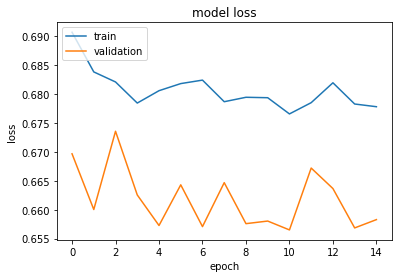

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


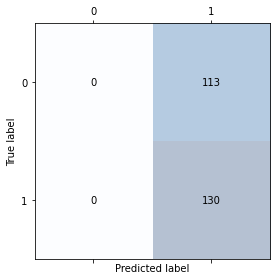

In [ ]:
import numpy as np
y_pred = model_late.predict_classes(X_test)
confmat = confusion_matrix(Y_test,y_pred)

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
      ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

In [ ]:
 from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       113
         1.0       0.53      1.00      0.70       130

    accuracy                           0.53       243
   macro avg       0.27      0.50      0.35       243
weighted avg       0.29      0.53      0.37       243



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#SECOND ATTEMPT

In [ ]:
from torch.utils.data import DataLoader
import math
from sentence_transformers import models, losses
from sentence_transformers import LoggingHandler, SentenceTransformer, util, InputExample
from sentence_transformers.evaluation import EmbeddingSimilarityEvaluator
from sentence_transformers.evaluation import LabelAccuracyEvaluator
import logging
from datetime import datetime
import sys
import os
import gzip
import csv

ModuleNotFoundError: ignored

In [ ]:
model_name = 'xlm-roberta-base'
train_batch_size = 16
word_embedding_model = models.Transformer(model_name)

NameError: ignored

In [ ]:
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(),
                               pooling_mode_mean_tokens=True,
                               pooling_mode_cls_token=False,
                               pooling_mode_max_tokens=False)

In [ ]:
model = SentenceTransformer(modules=[word_embedding_model, pooling_model])

In [ ]:
def label2int(value):
  if value==1.0:
    return 1
  elif value==0.0:
    return 0

In [ ]:
train_samples=[]
for i in range(0,int(len(df)*0.9)):
  label_id = label2int(rezultati[i])
  train_samples.append(InputExample(texts=[df["Recenica"][i]],label=label_id))

In [ ]:
train_dataloader = DataLoader(train_samples,shuffle=True,batch_size=train_batch_size)
train_loss = losses.SoftmaxLoss(model=model,sentence_embedding_dimension=model.get_sentence_embedding_dimension(),num_labels=2)


In [ ]:
dev_samples=[]
for i in range(int(0.9*len(df)),len(df)):
  label_id = label2int(rezultati[i])
  dev_samples.append(InputExample(texts=df["Recenica"][i],label=label_id))

In [ ]:
dev_evaluator = LabelAccuracyEvaluator(train_dataloader)

In [ ]:
num_epochs = 1
warmup_steps = math.ceil(len(train_dataloader) * num_epochs * 0.1)
warmup_steps

In [ ]:
model.fit(train_objectives=[(train_dataloader,train_loss)],
          evaluator=dev_evaluator,
          epochs=num_epochs)

#THIRD ATTEMPT

In [ ]:
final_model = SentenceTransformer("distiluse-base-multilingual-cased-v2")

In [ ]:
train_df = df.iloc[:2183,:] 
test_df = df.iloc[2183:,:]
train_df 

In [ ]:
test_df

In [ ]:
final_model.train(train_df)

SentenceTransformer(
  (0): Transformer(
    (auto_model): DistilBertModel(
      (embeddings): Embeddings(
        (word_embeddings): Embedding(119547, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (transformer): Transformer(
        (layer): ModuleList(
          (0): TransformerBlock(
            (attention): MultiHeadSelfAttention(
              (dropout): Dropout(p=0.1, inplace=False)
              (q_lin): Linear(in_features=768, out_features=768, bias=True)
              (k_lin): Linear(in_features=768, out_features=768, bias=True)
              (v_lin): Linear(in_features=768, out_features=768, bias=True)
              (out_lin): Linear(in_features=768, out_features=768, bias=True)
            )
            (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (ffn): FFN(
              (dr

In [ ]:
final_model.eval(test_df)

TypeError: ignored

In [ ]:
pip install pytorch-transformers

     |████████████████████████████████| 184kB 7.7MB/s 
     |████████████████████████████████| 133kB 8.4MB/s 
     |████████████████████████████████| 7.3MB 11.5MB/s 
     |████████████████████████████████| 71kB 10.4MB/s 
ERROR: botocore 1.20.27 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.


In [ ]:
pip install tensorboardX

     |████████████████████████████████| 317kB 9.1MB/s 


#FOURTH ATTEMPT

In [ ]:
import tqdm
df = df.fillna(0)

In [ ]:
train_df = df.iloc[:2183,:] 
test_df = df.iloc[2183:,:]

In [ ]:
train_df

Recenica  Value
0                                                                                                                                                             in some respects. And Im here to talk about these differences, because they actually matter for our health. For example, women are more likely than men to be diagnosed with an anxiety disorder or depression, not to mention headaches and migraines.    1.0
1     The experiments had to be wrong, and they were. Now our friend over there, Albert Einstein, used to pay very little attention when people said, "You know, theres a man with an experiment that seems to disagree with special relativity. DC Miller. What about that?" And he would say, "Aw, thatll go away." (Laughter) Now, why does stuff like that work? Thats the question. Now, yeah, what do we mea...    1.0
2              Ill try to make that clear -- partially clear. Why should it work, and is this something to do with human beings? Ill let you in on the answer to the last one that I offer, and that is, it has nothing to do with human beings. Somewhere in some other planet, orbiting some very distant star, maybe in a another galaxy, there could well be entities that are at least as intelligent as we are,    0.0
3     Somewhere in some other planet, orbiting some very distant star, maybe in a another galaxy, there could well be entities that are at least as intelligent as we are, and are interested in science. Its not impossible; I think there probably are lots. Very likely, none is close enough to interact with us. But they could be out there, very easily. And suppose they have, you know, very different se...    1.0
4     and are interested in science. Its not impossible; I think there probably are lots. Very likely, none is close enough to interact with us. But they could be out there, very easily. And suppose they have, you know, very different sensory apparatus, and so on. They have seven tentacles, and they have 14 little funny-looking compound eyes, and a brain shaped like a pretzel. Would they really have...    1.0
5                       They have seven tentacles, and they have 14 little funny-looking compound eyes, and a brain shaped like a pretzel. Would they really have different laws? There are lots of people who believe that, and I think it is utter baloney. I think there are laws out there, and we of course dont understand them at any given time very well -- but we try. And we try to get closer and closer.    1.0
6                                and a brain shaped like a pretzel. Would they really have different laws? There are lots of people who believe that, and I think it is utter baloney. I think there are laws out there, and we of course dont understand them at any given time very well -- but we try. And we try to get closer and closer. And someday, we may actually figure out the fundamental unified theory    1.0
7     Would they really have different laws? There are lots of people who believe that, and I think it is utter baloney. I think there are laws out there, and we of course dont understand them at any given time very well -- but we try. And we try to get closer and closer. And someday, we may actually figure out the fundamental unified theory of the particles and forces, what I call the "fundamental ...    1.0
8                                                                                        But even if we dont run across it in our lifetimes, we can still think there is one out there, and were just trying to get closer and closer to it. I think thats the main point to be made. We express these things mathematically. And when the mathematics is very simple -- when in terms of some mathematical notation,    1.0
9     There are even movies about it with a lot of wrong stuff. But the main thing here is that it predicts probabilities. Now, sometimes those probabilities are near certainties. And in a lot of familiar cases, they of course are. But other times theyre not, and you

In [ ]:
test_df

Recenica  Value
2183  Everybody remembered the pencil-yellow crank. Its different. It was getting its power in a different way. Its kind of childlike. Even though this wasnt the direction we went because the crank -- it really is stupid to have it on board, by the way. In spite of what some people in the press dont get it, didnt understand it, we didnt take it off because we didnt want to do -- having it on the lap...    1.0
2184  It was getting its power in a different way. Its kind of childlike. Even though this wasnt the direction we went because the crank -- it really is stupid to have it on board, by the way. In spite of what some people in the press dont get it, didnt understand it, we didnt take it off because we didnt want to do -- having it on the laptop itself is really not what you want. You want a separate t...    1.0
2185  Dual-mode display -- that sunlight displays fantastic. We were using it at lunch today in the sunlight, and the more sunlight the better. And that was really critical. The mesh network, itll become commonplace. And of course, "rugged" goes without saying. And the reason I think design matters isnt because I wanted to go to art school. And by the way, when I graduated from MIT, I thought the wo...    1.0
2186  We were using it at lunch today in the sunlight, and the more sunlight the better. And that was really critical. The mesh network, itll become commonplace. And of course, "rugged" goes without saying. And the reason I think design matters isnt because I wanted to go to art school. And by the way, when I graduated from MIT, I thought the worst and silliest thing to do would be to go to Paris fo...    1.0
2187  And that was really critical. The mesh network, itll become commonplace. And of course, "rugged" goes without saying. And the reason I think design matters isnt because I wanted to go to art school. And by the way, when I graduated from MIT, I thought the worst and silliest thing to do would be to go to Paris for six years. (Laughter) So, I didnt do that. But design matters for a number of rea...    1.0
2188  These are his slides, and so I dont have to talk about them. But it was really, to us, very important as a strategy. It wasnt just to kind of make it cute, because somebody -- you know, good design is very important. Yves showed one of the power-generating devices. The mesh network, the reason I -- and I wont go into it in great detail -- but when we deliver laptops to kids in the remotest and...    1.0
2189                       Not something youd envy or want to do. In the case of Libya, it was a lot of fun meeting Gaddafi in his tent. The camel smells were unbelievable. And it was 45 degrees C. I mean, this was not what youd call a cool experience. And former countries -- I say former, because none of them really came through this summer -- there was a big difference between getting a head of state    1.0
2190  The first day it was just wild. And then we said, "Well, lets get people to give many. Not just one, and get one, but maybe give 100, give 1,000." And thats where you come in. And thats where I think its very important. I dont want you all to go out and buy 400 dollars worth of laptops. Okay? Do it, but thats not going to help. Okay? If everybody in this room goes out tonight and orders one of...    0.0
2191                                                                               and will have, hopefully by then, maybe 100 million out there to children. Thank you. (Applause) But anyway, this is about the evils of science, so I think it’s perfect. ♫ My oh my, walking by, who’s the apple of my eye? ♫ ♫ Why, its my very own Clonie. ♫ ♫ Oh, if I should stroll the hood, who knew I could look so good ♫    1.0
2192                              And what he said, for me, was very moving. He said, "Life on Earth is at an ever-increasing risk of being wiped out by disaster ... I think the human race doesnt have a future if it doesnt go into space. I therefore want to encourage

In [ ]:
train_df["Value"] = (train_df["Value"]).astype(int)
test_df["Value"] = (test_df["Value"]).astype(int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_df

In [ ]:
train_df = pd.DataFrame({
    'id':range(len(train_df)),
    'label':train_df["Value"],
    'alpha':['a']*train_df.shape[0],
    'text': train_df["Recenica"].replace(r'\n', ' ', regex=True)
})
train_df.head()

id  ...                                                                                                                                                                                                                                                                                                                                                                                                             text
0   0  ...                                                                                                                                                          in some respects. And Im here to talk about these differences, because they actually matter for our health. For example, women are more likely than men to be diagnosed with an anxiety disorder or depression, not to mention headaches and migraines.
1   1  ...  The experiments had to be wrong, and they were. Now our friend over there, Albert Einstein, used to pay very little attention when people said, "You know, theres a man with an experiment that seems to disagree with special relativity. DC Miller. What about that?" And he would say, "Aw, thatll go away." (Laughter) Now, why does stuff like that work? Thats the question. Now, yeah, what do we mea...
2   2  ...           Ill try to make that clear -- partially clear. Why should it work, and is this something to do with human beings? Ill let you in on the answer to the last one that I offer, and that is, it has nothing to do with human beings. Somewhere in some other planet, orbiting some very distant star, maybe in a another galaxy, there could well be entities that are at least as intelligent as we are,
3   3  ...  Somewhere in some other planet, orbiting some very distant star, maybe in a another galaxy, there could well be entities that are at least as intelligent as we are, and are interested in science. Its not impossible; I think there probably are lots. Very likely, none is close enough to interact with us. But they could be out there, very easily. And suppose they have, you know, very different se...
4   4  ...  and are interested in science. Its not impossible; I think there probably are lots. Very likely, none is close enough to interact with us. But they could be out there, very easily. And suppose they have, you know, very different sensory apparatus, and so on. They have seven tentacles, and they have 14 little funny-looking compound eyes, and a brain shaped like a pretzel. Would they really have...

[5 rows x 4 columns]

In [ ]:
dev_df = pd.DataFrame({
    'id':range(len(test_df)),
    'label':test_df["Value"],
    'alpha':['a']*test_df.shape[0],
    'text': test_df["Recenica"].replace(r'\n', ' ', regex=True)
    
})
  

In [ ]:
dev_df.head()

In [ ]:

from __future__ import absolute_import, division, print_function

import csv
import logging
import os
import sys
from io import open

from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import matthews_corrcoef, f1_score

from multiprocessing import Pool, cpu_count
from tqdm import tqdm

In [ ]:
train_df.to_csv('/content/drive/MyDrive/train.tsv', sep='\t', index=False, header=False)
dev_df.to_csv('/content/drive/MyDrive/dev.tsv', sep='\t', index=False, header=False)

In [ ]:
from __future__ import absolute_import, division, print_function

import csv
import logging
import os
import sys
from io import open

from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import matthews_corrcoef, f1_score

from multiprocessing import Pool, cpu_count
from tqdm import tqdm

logger = logging.getLogger(__name__)
csv.field_size_limit(2147483647)

class InputExample(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, label=None):
        """Constructs a InputExample.
        Args:
            guid: Unique id for the example.
            text_a: string. The untokenized text of the first sequence. For single
            sequence tasks, only this sequence must be specified.
            text_b: (Optional) string. The untokenized text of the second sequence.
            Only must be specified for sequence pair tasks.
            label: (Optional) string. The label of the example. This should be
            specified for train and dev examples, but not for test examples.
        """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label


class InputFeatures(object):
    """A single set of features of data."""

    def __init__(self, input_ids, input_mask, segment_ids, label_id):
        self.input_ids = input_ids
        self.input_mask = input_mask
        self.segment_ids = segment_ids
        self.label_id = label_id


class DataProcessor(object):
    """Base class for data converters for sequence classification data sets."""

    def get_train_examples(self, data_dir):
        """Gets a collection of `InputExample`s for the train set."""
        raise NotImplementedError()

    def get_dev_examples(self, data_dir):
        """Gets a collection of `InputExample`s for the dev set."""
        raise NotImplementedError()

    def get_labels(self):
        """Gets the list of labels for this data set."""
        raise NotImplementedError()

    @classmethod
    def _read_tsv(cls, input_file, quotechar=None):
        """Reads a tab separated value file."""
        with open(input_file, "r", encoding="utf-8-sig") as f:
            reader = csv.reader(f, delimiter="\t", quotechar=quotechar)
            lines = []
            for line in reader:
                if sys.version_info[0] == 2:
                    line = list(unicode(cell, 'utf-8') for cell in line)
                lines.append(line)
            return lines


class BinaryProcessor(DataProcessor):
    """Processor for the binary data sets"""

    def get_train_examples(self, data_dir):
        """See base class."""
        return self._create_examples(
            self._read_tsv(os.path.join(data_dir, "train.tsv")), "train")

    def get_dev_examples(self, data_dir):
        """See base class."""
        return self._create_examples(
            self._read_tsv(os.path.join(data_dir, "dev.tsv")), "dev")

    def get_labels(self):
        """See base class."""
        return ["0", "1"]

    def _create_examples(self, lines, set_type):
        """Creates examples for the training and dev sets."""
        examples = []
        for (i, line) in enumerate(lines):
            guid = "%s-%s" % (set_type, i)
            text_a = line[3]
            label = line[1]
            examples.append(
                InputExample(guid=guid, text_a=text_a, text_b=None, label=label))
        return examples


def convert_example_to_feature(example_row, pad_token=0,
sequence_a_segment_id=0, sequence_b_segment_id=1,
cls_token_segment_id=1, pad_token_segment_id=0,
mask_padding_with_zero=True):
    example, label_map, max_seq_length, tokenizer, output_mode, cls_token_at_end, cls_token, sep_token, cls_token_segment_id, pad_on_left, pad_token_segment_id = example_row

    tokens_a = tokenizer.tokenize(example.text_a)

    tokens_b = None
    if example.text_b:
        tokens_b = tokenizer.tokenize(example.text_b)
        # Modifies `tokens_a` and `tokens_b` in place so that the total
        # length is less than the specified length.
        # Account for [CLS], [SEP], [SEP] with "- 3"
        _truncate_seq_pair(tokens_a, tokens_b, max_seq_length - 3)
    else:
        # Account for [CLS] and [SEP] with "- 2"
        if len(tokens_a) > max_seq_length - 2:
            tokens_a = tokens_a[:(max_seq_length - 2)]

    # The convention in BERT is:
    # (a) For sequence pairs:
    #  tokens:   [CLS] is this jack ##son ##ville ? [SEP] no it is not . [SEP]
    #  type_ids:   0   0  0    0    0     0       0   0   1  1  1  1   1   1
    # (b) For single sequences:
    #  tokens:   [CLS] the dog is hairy . [SEP]
    #  type_ids:   0   0   0   0  0     0   0
    #
    # Where "type_ids" are used to indicate whether this is the first
    # sequence or the second sequence. The embedding vectors for `type=0` and
    # `type=1` were learned during pre-training and are added to the wordpiece
    # embedding vector (and position vector). This is not *strictly* necessary
    # since the [SEP] token unambiguously separates the sequences, but it makes
    # it easier for the model to learn the concept of sequences.
    #
    # For classification tasks, the first vector (corresponding to [CLS]) is
    # used as as the "sentence vector". Note that this only makes sense because
    # the entire model is fine-tuned.
    tokens = tokens_a + [sep_token]
    segment_ids = [sequence_a_segment_id] * len(tokens)

    if tokens_b:
        tokens += tokens_b + [sep_token]
        segment_ids += [sequence_b_segment_id] * (len(tokens_b) + 1)

    if cls_token_at_end:
        tokens = tokens + [cls_token]
        segment_ids = segment_ids + [cls_token_segment_id]
    else:
        tokens = [cls_token] + tokens
        segment_ids = [cls_token_segment_id] + segment_ids

    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [1 if mask_padding_with_zero else 0] * len(input_ids)

    # Zero-pad up to the sequence length.
    padding_length = max_seq_length - len(input_ids)
    if pad_on_left:
        input_ids = ([pad_token] * padding_length) + input_ids
        input_mask = ([0 if mask_padding_with_zero else 1] * padding_length) + input_mask
        segment_ids = ([pad_token_segment_id] * padding_length) + segment_ids
    else:
        input_ids = input_ids + ([pad_token] * padding_length)
        input_mask = input_mask + ([0 if mask_padding_with_zero else 1] * padding_length)
        segment_ids = segment_ids + ([pad_token_segment_id] * padding_length)

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length

    if output_mode == "classification":
        label_id = label_map[example.label]
    elif output_mode == "regression":
        label_id = float(example.label)
    else:
        raise KeyError(output_mode)

    return InputFeatures(input_ids=input_ids,
                        input_mask=input_mask,
                        segment_ids=segment_ids,
                        label_id=label_id)
    

def convert_examples_to_features(examples, label_list, max_seq_length,
                                 tokenizer, output_mode,
                                 cls_token_at_end=False, pad_on_left=False,
                                 cls_token='[CLS]', sep_token='[SEP]', pad_token=0,
                                 sequence_a_segment_id=0, sequence_b_segment_id=1,
                                 cls_token_segment_id=1, pad_token_segment_id=0,
                                 mask_padding_with_zero=True):
    """ Loads a data file into a list of `InputBatch`s
        `cls_token_at_end` define the location of the CLS token:
            - False (Default, BERT/XLM pattern): [CLS] + A + [SEP] + B + [SEP]
            - True (XLNet/GPT pattern): A + [SEP] + B + [SEP] + [CLS]
        `cls_token_segment_id` define the segment id associated to the CLS token (0 for BERT, 2 for XLNet)
    """

    label_map = {label : i for i, label in enumerate(label_list)}

    examples = [(example, label_map, max_seq_length, tokenizer, output_mode, cls_token_at_end, cls_token, sep_token, cls_token_segment_id, pad_on_left, pad_token_segment_id) for example in examples]

    process_count = cpu_count() - 2

    with Pool(process_count) as p:
        features = list(tqdm(p.imap(convert_example_to_feature, examples, chunksize=100), total=len(examples)))


    return features


def _truncate_seq_pair(tokens_a, tokens_b, max_length):
    """Truncates a sequence pair in place to the maximum length."""

    # This is a simple heuristic which will always truncate the longer sequence
    # one token at a time. This makes more sense than truncating an equal percent
    # of tokens from each, since if one sequence is very short then each token
    # that's truncated likely contains more information than a longer sequence.
    while True:
        total_length = len(tokens_a) + len(tokens_b)
        if total_length <= max_length:
            break
        if len(tokens_a) > len(tokens_b):
            tokens_a.pop()
        else:
            tokens_b.pop()


processors = {
    "binary": BinaryProcessor
}

output_modes = {
    "binary": "classification"
}

GLUE_TASKS_NUM_LABELS = {
    "binary": 2
}

In [ ]:
pip install utils

In [ ]:

from __future__ import absolute_import, division, print_function

import glob
import logging
import os
import random
import json

import numpy as np
import torch
from torch.utils.data import (DataLoader, RandomSampler, SequentialSampler,
                              TensorDataset)
import random
from torch.utils.data.distributed import DistributedSampler
from tqdm import tqdm_notebook, trange

from pytorch_transformers import (WEIGHTS_NAME, BertConfig, BertForSequenceClassification, BertTokenizer,
                                  XLMConfig, XLMForSequenceClassification, XLMTokenizer, 
                                  XLNetConfig, XLNetForSequenceClassification, XLNetTokenizer,
                                  RobertaConfig, RobertaForSequenceClassification, RobertaTokenizer)

from pytorch_transformers import AdamW, WarmupLinearSchedule

import utils

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [ ]:
args = {
    'data_dir': '/content/drive/MyDrive/',
    'model_type':  'xlnet',
    'model_name': 'xlnet-base-cased',
    'task_name': 'binary',
    'output_dir': 'outputs/',
    'cache_dir': 'cache/',
    'do_train': True,
    'do_eval': True,
    'fp16': True,
    'fp16_opt_level': 'O1',
    'max_seq_length': 128,
    'output_mode': 'classification',
    'train_batch_size': 8,
    'eval_batch_size': 8,

    'gradient_accumulation_steps': 1,
    'num_train_epochs': 1,
    'weight_decay': 0,
    'learning_rate': 4e-5,
    'adam_epsilon': 1e-8,
    'warmup_steps': 0,
    'max_grad_norm': 1.0,

    'logging_steps': 50,
    'evaluate_during_training': False,
    'save_steps': 2000,
    'eval_all_checkpoints': True,

    'overwrite_output_dir': False,
    'reprocess_input_data': True,
    'notes': 'Using Yelp Reviews dataset'
}
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
MODEL_CLASSES = {
    'bert': (BertConfig, BertForSequenceClassification, BertTokenizer),
    'xlnet': (XLNetConfig, XLNetForSequenceClassification, XLNetTokenizer),
    'xlm': (XLMConfig, XLMForSequenceClassification, XLMTokenizer),
    'roberta': (RobertaConfig, RobertaForSequenceClassification, RobertaTokenizer)
}

config_class, model_class, tokenizer_class = MODEL_CLASSES[args['model_type']]


In [ ]:
config = config_class.from_pretrained(args['model_name'], num_labels=2, finetuning_task=args['task_name'])
tokenizer = tokenizer_class.from_pretrained(args['model_name'])

INFO:pytorch_transformers.tokenization_utils:loading file https://s3.amazonaws.com/models.huggingface.co/bert/xlnet-base-cased-spiece.model from cache at /root/.cache/torch/pytorch_transformers/dad589d582573df0293448af5109cb6981ca77239ed314e15ca63b7b8a318ddd.8b10bd978b5d01c21303cc761fc9ecd464419b3bf921864a355ba807cfbfafa8


In [ ]:
model = model_class.from_pretrained(args['model_name'])

RuntimeError: ignored

In [ ]:

model.to(device);

In [ ]:
task = args['task_name']

processor = processors[task]()
label_list = processor.get_labels()
num_labels = len(label_list)

In [ ]:
def load_and_cache_examples(task, tokenizer, evaluate=False):
    processor = processors[task]()
    output_mode = args['output_mode']
    
    mode = 'dev' if evaluate else 'train'
    cached_features_file = os.path.join(args['data_dir'], f"cached_{mode}_{args['model_name']}_{args['max_seq_length']}_{task}")
    
    if os.path.exists(cached_features_file) and not args['reprocess_input_data']:
        logger.info("Loading features from cached file %s", cached_features_file)
        features = torch.load(cached_features_file)
               
    else:
        logger.info("Creating features from dataset file at %s", args['data_dir'])
        label_list = processor.get_labels()
        examples = processor.get_dev_examples(args['data_dir']) if evaluate else processor.get_train_examples(args['data_dir'])
        
        features = convert_examples_to_features(examples, label_list, args['max_seq_length'], tokenizer, output_mode,
            cls_token_at_end=bool(args['model_type'] in ['xlnet']),            # xlnet has a cls token at the end
            cls_token=tokenizer.cls_token,
            sep_token=tokenizer.sep_token,
            cls_token_segment_id=2 if args['model_type'] in ['xlnet'] else 0,
            pad_on_left=bool(args['model_type'] in ['xlnet']),                 # pad on the left for xlnet
            pad_token_segment_id=4 if args['model_type'] in ['xlnet'] else 0)
        
        logger.info("Saving features into cached file %s", cached_features_file)
        torch.save(features, cached_features_file)
        
    all_input_ids = torch.tensor([f.input_ids for f in features], dtype=torch.long)
    all_input_mask = torch.tensor([f.input_mask for f in features], dtype=torch.long)
    all_segment_ids = torch.tensor([f.segment_ids for f in features], dtype=torch.long)
    if output_mode == "classification":
        all_label_ids = torch.tensor([f.label_id for f in features], dtype=torch.long)
    elif output_mode == "regression":
        all_label_ids = torch.tensor([f.label_id for f in features], dtype=torch.float)

    dataset = TensorDataset(all_input_ids, all_input_mask, all_segment_ids, all_label_ids)
    return dataset

In [ ]:
def train(train_dataset, model, tokenizer):
    tb_writer = SummaryWriter()
    
    train_sampler = RandomSampler(train_dataset)
    train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=args['train_batch_size'])
    
    t_total = len(train_dataloader) // args['gradient_accumulation_steps'] * args['num_train_epochs']
    
    no_decay = ['bias', 'LayerNorm.weight']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': args['weight_decay']},
        {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ]
    optimizer = AdamW(optimizer_grouped_parameters, lr=args['learning_rate'], eps=args['adam_epsilon'])
    scheduler = WarmupLinearSchedule(optimizer, warmup_steps=args['warmup_steps'], t_total=t_total)
    
    if args['fp16']:
        try:
            from apex import amp
        except ImportError:
            raise ImportError("Please install apex from https://www.github.com/nvidia/apex to use fp16 training.")
        model, optimizer = amp.initialize(model, optimizer, opt_level=args['fp16_opt_level'])
        
    logger.info("***** Running training *****")
    logger.info("  Num examples = %d", len(train_dataset))
    logger.info("  Num Epochs = %d", args['num_train_epochs'])
    logger.info("  Total train batch size  = %d", args['train_batch_size'])
    logger.info("  Gradient Accumulation steps = %d", args['gradient_accumulation_steps'])
    logger.info("  Total optimization steps = %d", t_total)

    global_step = 0
    tr_loss, logging_loss = 0.0, 0.0
    model.zero_grad()
    train_iterator = trange(int(args['num_train_epochs']), desc="Epoch")
    
    for _ in train_iterator:
        epoch_iterator = tqdm_notebook(train_dataloader, desc="Iteration")
        for step, batch in enumerate(epoch_iterator):
            model.train()
            batch = tuple(t.to(device) for t in batch)
            inputs = {'input_ids':      batch[0],
                      'attention_mask': batch[1],
                      'token_type_ids': batch[2] if args['model_type'] in ['bert', 'xlnet'] else None,  # XLM don't use segment_ids
                      'labels':         batch[3]}
            outputs = model(**inputs)
            loss = outputs[0]  # model outputs are always tuple in pytorch-transformers (see doc)
            print("\r%f" % loss, end='')

            if args['gradient_accumulation_steps'] > 1:
                loss = loss / args['gradient_accumulation_steps']

            if args['fp16']:
                with amp.scale_loss(loss, optimizer) as scaled_loss:
                    scaled_loss.backward()
                torch.nn.utils.clip_grad_norm_(amp.master_params(optimizer), args['max_grad_norm'])
                
            else:
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), args['max_grad_norm'])

            tr_loss += loss.item()
            if (step + 1) % args['gradient_accumulation_steps'] == 0:
                scheduler.step()  # Update learning rate schedule
                optimizer.step()
                model.zero_grad()
                global_step += 1

                if args['logging_steps'] > 0 and global_step % args['logging_steps'] == 0:
                    # Log metrics
                    if args['evaluate_during_training']:  # Only evaluate when single GPU otherwise metrics may not average well
                        results = evaluate(model, tokenizer)
                        for key, value in results.items():
                            tb_writer.add_scalar('eval_{}'.format(key), value, global_step)
                    tb_writer.add_scalar('lr', scheduler.get_lr()[0], global_step)
                    tb_writer.add_scalar('loss', (tr_loss - logging_loss)/args['logging_steps'], global_step)
                    logging_loss = tr_loss

                if args['save_steps'] > 0 and global_step % args['save_steps'] == 0:
                    # Save model checkpoint
                    output_dir = os.path.join(args['output_dir'], 'checkpoint-{}'.format(global_step))
                    if not os.path.exists(output_dir):
                        os.makedirs(output_dir)
                    model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
                    model_to_save.save_pretrained(output_dir)
                    logger.info("Saving model checkpoint to %s", output_dir)


    return global_step, tr_loss / global_step

In [ ]:
from sklearn.metrics import mean_squared_error, matthews_corrcoef, confusion_matrix
from scipy.stats import pearsonr

def get_mismatched(labels, preds):
    mismatched = labels != preds
    examples = processor.get_dev_examples(args['data_dir'])
    wrong = [i for (i, v) in zip(examples, mismatched) if v]
    
    return wrong

def get_eval_report(labels, preds):
    mcc = matthews_corrcoef(labels, preds)
    tn, fp, fn, tp = confusion_matrix(labels, preds).ravel()
    return {
        "mcc": mcc,
        "tp": tp,
        "tn": tn,
        "fp": fp,
        "fn": fn
    }, get_mismatched(labels, preds)

def compute_metrics(task_name, preds, labels):
    assert len(preds) == len(labels)
    return get_eval_report(labels, preds)

def evaluate(model, tokenizer, prefix=""):
    # Loop to handle MNLI double evaluation (matched, mis-matched)
    eval_output_dir = args['output_dir']

    results = {}
    EVAL_TASK = args['task_name']

    eval_dataset = load_and_cache_examples(EVAL_TASK, tokenizer, evaluate=True)
    if not os.path.exists(eval_output_dir):
        os.makedirs(eval_output_dir)


    eval_sampler = SequentialSampler(eval_dataset)
    eval_dataloader = DataLoader(eval_dataset, sampler=eval_sampler, batch_size=args['eval_batch_size'])

    # Eval!
    logger.info("***** Running evaluation {} *****".format(prefix))
    logger.info("  Num examples = %d", len(eval_dataset))
    logger.info("  Batch size = %d", args['eval_batch_size'])
    eval_loss = 0.0
    nb_eval_steps = 0
    preds = None
    out_label_ids = None
    for batch in tqdm_notebook(eval_dataloader, desc="Evaluating"):
        model.eval()
        batch = tuple(t.to(device) for t in batch)

        with torch.no_grad():
            inputs = {'input_ids':      batch[0],
                      'attention_mask': batch[1],
                      'token_type_ids': batch[2] if args['model_type'] in ['bert', 'xlnet'] else None,  # XLM don't use segment_ids
                      'labels':         batch[3]}
            outputs = model(**inputs)
            tmp_eval_loss, logits = outputs[:2]

            eval_loss += tmp_eval_loss.mean().item()
        nb_eval_steps += 1
        if preds is None:
            preds = logits.detach().cpu().numpy()
            out_label_ids = inputs['labels'].detach().cpu().numpy()
        else:
            preds = np.append(preds, logits.detach().cpu().numpy(), axis=0)
            out_label_ids = np.append(out_label_ids, inputs['labels'].detach().cpu().numpy(), axis=0)

    eval_loss = eval_loss / nb_eval_steps
    if args['output_mode'] == "classification":
        preds = np.argmax(preds, axis=1)
    elif args['output_mode'] == "regression":
        preds = np.squeeze(preds)
    result, wrong = compute_metrics(EVAL_TASK, preds, out_label_ids)
    results.update(result)

    output_eval_file = os.path.join(eval_output_dir, "eval_results.txt")
    with open(output_eval_file, "w") as writer:
        logger.info("***** Eval results {} *****".format(prefix))
        for key in sorted(result.keys()):
            logger.info("  %s = %s", key, str(result[key]))
            writer.write("%s = %s\n" % (key, str(result[key])))

    return results, wrong

In [ ]:

if args['do_train']:
    train_dataset = load_and_cache_examples(task, tokenizer)
    global_step, tr_loss = train(train_dataset, model, tokenizer)
    logger.info(" global_step = %s, average loss = %s", global_step, tr_loss)


INFO:__main__:Creating features from dataset file at /content/drive/MyDrive/


ValueError: ignored

In [ ]:

if args['do_train']:
    if not os.path.exists(args['output_dir']):
            os.makedirs(args['output_dir'])
    logger.info("Saving model checkpoint to %s", args['output_dir'])
    
    model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
    model_to_save.save_pretrained(args['output_dir'])
    tokenizer.save_pretrained(args['output_dir'])
    torch.save(args, os.path.join(args['output_dir'], 'training_args.bin'))

INFO:__main__:Saving model checkpoint to outputs/


In [ ]:
results = {}
if args['do_eval']:
    checkpoints = [args['output_dir']]
    if args['eval_all_checkpoints']:
        checkpoints = list(os.path.dirname(c) for c in sorted(glob.glob(args['output_dir'] + '/**/' + WEIGHTS_NAME, recursive=True)))
        logging.getLogger("pytorch_transformers.modeling_utils").setLevel(logging.WARN)  # Reduce logging
    logger.info("Evaluate the following checkpoints: %s", checkpoints)
    for checkpoint in checkpoints:
        global_step = checkpoint.split('-')[-1] if len(checkpoints) > 1 else ""
        model = model_class.from_pretrained(checkpoint)
        model.to(device)
        result, wrong_preds = evaluate(model, tokenizer, prefix=global_step)
        result = dict((k + '_{}'.format(global_step), v) for k, v in result.items())
        results.update(result)

INFO:__main__:Evaluate the following checkpoints: ['outputs']
INFO:__main__:Creating features from dataset file at /content/drive/MyDrive/


ValueError: ignored

#FIFTH ATTEMPT- FINAL SOLUTION



In [ ]:
from sklearn.model_selection import train_test_split
df = df.fillna(0)
df_bg = df_bg.fillna(0)
train_df , test_df = train_test_split(df,test_size=0.1)
train_df_bg, test_df_bg = train_test_split(df_bg,test_size=0.1)
#train_df = df.iloc[:2184,:] 
#test_df = df.iloc[2184:,:]
#train_df_bg = df_bg.iloc[:2184,:] 
#test_df_bg = df_bg.iloc[2184:,:]

In [ ]:
train_df_bg.head()

Recenica  Value
1038                                                                                             Но ми беше любопитно какво още биха могли да направят, ако можеха да направят това. Започнах опити на други теми например - с произношение. Има една общност от деца в Северна Индия, чието произношение на английски е наистина лошо, а на тях им беше нужно добро произношение,  за да си намерят по-добра работа.    0.0
786                                                                                                                                                  не с много въображение. Написах на всички по един ред четворки, а на себе си - ред шестици, просто понеже нали така и така бях там... Все още съм озадачена от поведението си. Не разбирам от къде ми дойде тази идея. Не разбирам защо толкова много ми хареса.    0.0
2258                                                                                          заради моето бедро и аз някак си имах нужда от знак. И аз видях знак. През прозореца на малкия магазин за подаръци на болницата аз видях знак. Имаше сложена табела, която гласеше "Търсим доброволци". Хм. Ами, те ме приеха веднага. Без проверки, без никои от обичайните неща, не. Те бяха отчаяни за доброволците,    0.0
913                                                                                                                                                                                 Но това е стереотип, и стереотипите за нещата са често, ако не винаги, погрешни. Например много хора се сещат за аутизъм и мислят веднага за "Рейнман". Това е общото убеждение, че всяка една личност с аутизъм е Дъстин Хофман,    0.0
2137  към по-великата война, към по-великата битка." А те казали: "Вестителю на Бог, изтощени сме от битки. Как можем да отидем на по-велика битка? Той отвърнал: "Това е битката със себе си, битката на егото." Изворите на човешките проблеми са свързани с еготизма, аз. Прочутият суфи учител Руми, много добре познат на повечето от вас, има една история, разказваща за човек, който отива в къщата на при...    0.0

In [ ]:
train_df.head()


Recenica  Value
1212  I can rearrange the fluxons, and it will be locked in this new configuration. Like this, or move it slightly to the right or to the left. So, this is quantum locking -- actually locking -- three-dimensional locking of the superconductor. Of course, I can turn it upside down, and it will remain locked. Now, now that we understand that this so-called levitation is actually locking, Yeah, we unde...    1.0
2013                                                                           And, you know, I was the only female U.S. sprinter. So they call us out and, you know -- "Ladies, you have one minute." And I remember putting my blocks in and just feeling horrified because there was just this murmur coming over the crowd, like, the ones who are close enough to the starting line to see. And Im like, "I know    0.0
1777                                         goes very different ways depending on how you think, and whether you think of the remembering self or you think of the experiencing self. This is going to influence policy, I think, in years to come. In the United States, efforts are being made to measure the experience happiness of the population. This is going to be, I think, within the next decade or two,    1.0
730      So it was taken for granted that I attend some of the best universities, which in turn opened the door to a world of opportunity. Unfortunately, most of the people in the world are not so lucky. In some parts of the world, for example, South Africa, education is just not readily accessible. In South Africa, the educational system was constructed in the days of apartheid for the white minority.    0.0
2283                                                                              and we said, "Theres a point to that. Lets sell pirate supplies." This is the pirate supply store. You see, this is sort of a sketch I did on a napkin. A great carpenter built all this stuff and you see, we made it look sort of pirate supply-like. Here you see planks sold by the foot and we have supplies to combat scurvy.    0.0

In [ ]:
train_df["Value"] = (train_df["Value"]).astype(int)
test_df["Value"] = (test_df["Value"]).astype(int)
train_df_bg["Value"] = (train_df_bg["Value"]).astype(int)
test_df_bg["Value"] = (test_df_bg["Value"]).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
pip install simpletransformers

     |████████████████████████████████| 215kB 18.8MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 2.0MB 51.2MB/s 
     |████████████████████████████████| 317kB 40.3MB/s 
     |████████████████████████████████| 7.5MB 53.3MB/s 
     |████████████████████████████████| 1.2MB 49.0MB/s 
     |████████████████████████████████| 1.9MB 46.2MB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
     |████████████████████████████████| 3.2MB 46.6MB/s 
     |████████████████████████████████| 163kB 59.2MB/s 
     |████████████████████████████████| 133kB 54.9MB/s 
     |████████████████████████████████| 102kB 15.4MB/s 
     |████████████████████████████████| 4.6MB 47.0MB/s 
     |████████████████████████████████| 81kB 12.9MB/s 
     |████████████████████████████████| 112kB 60.6MB/s 
     |████████████████████████████████| 890kB 52.5MB/s 
     |████████████████████████████████| 71kB 10.3MB/s 
     |████████████████████████████████| 122kB 59.2MB/

In [ ]:
from simpletransformers.classification import ClassificationModel


In [ ]:
model_attempt4 = ClassificationModel('xlmroberta','xlm-roberta-base',args={'overwrite_output_dir': True,'num_train_epochs': 5,'gradient_accumulation_steps':10})
model_attempt4.train_model(train_df)
result, model_ooutputs, wrong_predictions =model_attempt4.eval_model(test_df)

Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weig

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:345: UserWarning: use_multiprocessing automatically disabled as xlmroberta fails when using multiprocessing for feature conversion.
  f"use_multiprocessing automatically disabled as {model_type}"
/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/274 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/274 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/274 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/274 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/274 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/31 [00:00<?, ?it/s]

In [ ]:
model_attempt4.train_model(train_df_bg)
result_bg, model_ooutputs_bg, wrong_predictions_bg = model_attempt4.eval_model(test_df_bg)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:446: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/274 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/274 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/274 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/274 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/274 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1026: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running Evaluation:   0%|          | 0/31 [00:00<?, ?it/s]

In [ ]:
result

{'auprc': 0.8971762116973759,
 'auroc': 0.8754251700680272,
 'eval_loss': 0.42062925799719747,
 'fn': 7,
 'fp': 33,
 'mcc': 0.6570164559976354,
 'tn': 63,
 'tp': 140}

In [ ]:
f1_score = 2*result['tp']/(2*result['tp']+result['fp']+result['fn'])
f1_score

0.875

In [ ]:
f1_score_bg = 2*result_bg['tp']/(2*result_bg['tp']+result_bg['fp']+result_bg['fn'])
f1_score_bg

0.8152866242038217

In [ ]:
result_bg

{'auprc': 0.8357300402621827,
 'auroc': 0.8085367564534232,
 'eval_loss': 0.6911535576706932,
 'fn': 16,
 'fp': 42,
 'mcc': 0.4980071633173618,
 'tn': 57,
 'tp': 128}